# Ant sorting

### General rules
No two objects can exist on the same cell

No two ants can exist on the same cell (not yet the case)

In [1]:
import numpy as np
import random

In [2]:
class Ant:
    """Agent that moves object on the grid"""
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.laden = False

    def pickup(self, object):
        self.object = object
        self.laden = True
        
    def drop(self, object):
        self.object = 0
        self.laden = False
        
    def move(self):
        neighbours = von_neumann_neighbourhood(self.x, self.y)
        self.x, self.y = neighbours[random.randint(0, len(neighbours) - 1)]
        

In [3]:
def von_neumann_neighbourhood(x, y):
    """return coordinates of all cells in the Von Neumann neighbourhood of the input cell"""
    
    neighbours = []
    if x - 1 >= 0:
        neighbours.append((x - 1, y))
    if x + 1 < grid_size:
        neighbours.append((x + 1, y))
    if y - 1 >= 0:
        neighbours.append((x, y - 1))
    if y + 1 < grid_size:
        neighbours.append((x, y + 1))
        
    return neighbours

In [4]:
def dissimilarity(object_o, object_n):
    """calculate dissimilarity between objects"""
    
    return object_o - object_n

In [5]:
def local_density(x_o, y_o):
    """calculate local density"""
    
    neighbourhood = von_neumann_neighbourhood(x, y)
    s2 = len(neighbourhood) + 1
    similarity = 0
    
    for x_n, y_n in neighbourhood:
        similarity += 1 - dissimilarity(grid[x, y], grid[x_n, y_n])/alpha
        
    return max(0, (1/s2)*similarity)

In [6]:
def pickup_probability(local_density):
    """calculate pickup probability"""
    
    return (k1/(k1 + local_density))**2

In [7]:
def drop_probability(local_density):
    """calculate drop probability"""
    
    if local_density < k2:
        probability = 2*local_density
    else:
        probability = 1
        
    return probability

## Parameters

In [17]:
grid_size = 50
t_total = 1000000
k1 = 0.1
k2 = 10
alpha = 0.1
ants = [Ant(1, 1), Ant(2, 2), Ant(3, 3)]

In [25]:
grid = np.zeros((grid_size, grid_size))
for i in range(625):
    color = random.randint(1, 5)
    x = random.randint(0, grid_size - 1)
    y = random.randint(0, grid_size - 1)
    grid[x, y] = color

ants = []
for i in range(125):
    x = random.randint(0, grid_size - 1)
    y = random.randint(0, grid_size - 1)
    ants.append(Ant(x, y))

In [19]:
original_grid = np.copy(grid)

## Simulation

### !!Grid niet elke timestep opslaan, is meerdere GB

In [20]:
#grids = []

for t in range(1, t_total):
    
    for ant in ants:
        
        if (ant.laden == False) & (grid[ant.x, ant.y] != 0):
            p_pickup = pickup_probability(local_density(ant.x, ant.y))
            
            if random.random() <= p_pickup:
                ant.pickup(grid[ant.x, ant.y])
                grid[ant.x, ant.y] = 0
                
        elif (ant.laden == True) & (grid[ant.x, ant.y] == 0):
            p_drop = drop_probability(local_density(ant.x, ant.y))
            
            if random.random() <= p_drop:
                grid[ant.x, ant.y] = ant.object
                ant.drop(grid[ant.x, ant.y])
        
        ant.move()
        #grids.append(np.copy(grid))
        
#for ant in ants:

#    grid[ant.x, ant.y] = ant.object
#    ant.drop(grid[ant.x, ant.y])

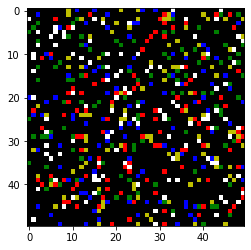

In [21]:
import matplotlib.pyplot as plt
import matplotlib
plt.imshow(original_grid, cmap = matplotlib.colors.ListedColormap(['k','r','y','b', 'w', 'g']))

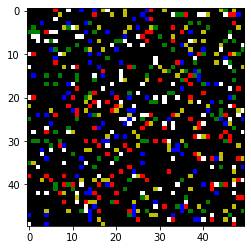

In [22]:
plt.imshow(grid, cmap = matplotlib.colors.ListedColormap(['k','r','y','b', 'w', 'g']))

In [23]:
temp = grid == original_grid
sum(sum(temp))

1592

## With clusters

In [30]:
class Cluster:
    """cluster object"""
    
    def __init__(self):
        self.x = []
        self.y = []
        self.objects = []

    def add_object(self, x, y, object):
        self.x.append(x)
        self.y.append(y)
        self.objects.append(object)

In [35]:
def calculate_clusters(grid):
    clusters = []
    cluster_grid = np.zeros((grid_size, grid_size))
    
    #iterate over all grid items
    for x in range(grid_size):
        for y in range(grid_size):
            if grid[x, y] != 0
            for x_n, y_n in von_neumann_neighbourhood(x, y):
                
                #check dissimilarity between neighbours
                ds = dissimilarity(grid[x, y], grid[x_n, y_n])
                
                if ds == 0:
                    
                    #check if neighbour is in a cluster, if so, add to the cluster
                    if cluster_grid[x_n, y_n] != 0:
                        clusters[int(cluster_grid[x_n, y_n])].add_object(x, y, grid[x, y])
                        cluster_grid[x, y] = cluster_grid[x_n, y_n]
                        
                    #otherwise, create a new cluster
                    else:
                        clusters.append(Cluster())
                        clusters[len(clusters) - 1].add_object(x, y, grid[x, y])
                        cluster_grid[x, y] = len(clusters) - 1
                        
                    break
                    
    return clusters, cluster_grid

In [36]:
clusters, cluster_grid = calculate_clusters(grid)

In [38]:
len(clusters)

430

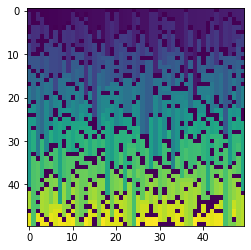

In [39]:
plt.imshow(cluster_grid)
#seems to be clustering zeros

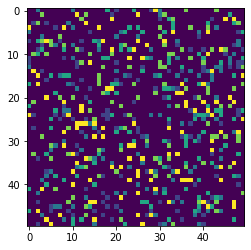

In [40]:
plt.imshow(grid)

In [ ]:
#grids = []

for t in range(1, t_total):
    
    for ant in ants:
        
        if (ant.laden == False) & (grid[ant.x, ant.y] != 0):
            p_pickup = pickup_probability(local_density(ant.x, ant.y))
            
            if random.random() <= p_pickup:
                ant.pickup(grid[ant.x, ant.y])
                grid[ant.x, ant.y] = 0
                
        elif (ant.laden == True) & (grid[ant.x, ant.y] == 0):
            p_drop = drop_probability(local_density(ant.x, ant.y))
            
            if random.random() <= p_drop:
                grid[ant.x, ant.y] = ant.object
                ant.drop(grid[ant.x, ant.y])
        
        ant.move()
        #grids.append(np.copy(grid))
        
#for ant in ants:

#    grid[ant.x, ant.y] = ant.object
#    ant.drop(grid[ant.x, ant.y])